In [5]:
import numpy as np
import matplotlib.pyplot as plt 
#simple mathematical opperations 
def math_opp (a,b):
    add = a+b #addtion of two number
    sub = a-b #subtraction of two numbers
    return add, sub

In [6]:
num1 = 7789
num2 = 543
print (math_opp(num1, num2))

(8332, 7246)


In [7]:
#for loop, print, np.linspace
num_val = np.linspace (1, 10, 10) #np.linspace(start, end, number of equally spaced values btw the ranges)
print (num_val)
for i in range(len(num_val)-1):
    #print (float(i)) #if you want floating point values
    print (i)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
0
1
2
3
4
5
6
7
8


In [244]:
def Psat_calc(A, B, C, T_min, T_max,n_bp):  #ethanol
    Pi_sat=[]
    t_vals=[]
    P_sat=np.exp(A-(B/(n_bp+C)))#Psat at boiling point
    print(P_sat)
    for T in np.linspace(T_min,T_max,96):
        P_sat=np.exp(A-(B/(T+C)))
        print('{} kPa'.format(P_sat))
        Pi_sat.append(P_sat)
        t_vals.append(int(T))
    return Pi_sat,t_vals

In [245]:
#A,B,C are constants (Antoine equation) values can be taken from the book or internet values below are for ethanol
P_vals,T_vals = Psat_calc(A=16.8958, B=3795.17, C=230.918, T_min=0, T_max=96, n_bp=78.32) #Ethanol constants from book Table B.2
#P_vals,T_vals =Psat_calc(A=16.3872, B=3885.70, C=230.170, T_min=0, T_max=120, n_bp=100)

101.81415702464874
1.5851174748489154 kPa
1.7027888473225155 kPa
1.8280594387409796 kPa
1.9613427610474201 kPa
2.1030702812517545 kPa
2.253691976002837 kPa
2.4136768942676117 kPa
2.583513727948249 kPa
2.763711390261093 kPa
2.954799601693204 kPa
3.1573294833449776 kPa
3.371874157460277 kPa
3.5990293549383625 kPa
3.8394140296151247 kPa
4.093670979094609 kPa
4.362467471905361 kPa
4.646495880750214 kPa
4.94647432161192 kPa
5.263147298471646 kPa
5.597286353391887 kPa
5.949690721710047 kPa
6.321187992084102 kPa
6.712634771127383 kPa
7.124917352364375 kPa
7.558952389236265 kPa
8.015687571880205 kPa
8.496102307403147 kPa
9.001208403367533 kPa
9.532050754203258 kPa
10.089708030257071 kPa
10.67529336918847 kPa
11.289955069418369 kPa
11.934877285335377 kPa
12.611280723962087 kPa
13.320423342782586 kPa
14.063601048431236 kPa
14.842148395941626 kPa
15.657439288253297 kPa
16.510887675674674 kPa
17.403948254999218 kPa
18.338117167971447 kPa
19.31493269880165 kPa
20.335975970426393 kPa
21.402871639213

In [246]:
#we saved the output arrays from previous function and we will use them here in our plot function
def plot_data(Pi_sat,t_vals):
    plt.figure()
    plt.plot(t_vals,Pi_sat,color='red')
    plt.xlabel('Temperature($^\circ$C)')
    plt.ylabel('Psat (kPa)')
    plt.show()
    return

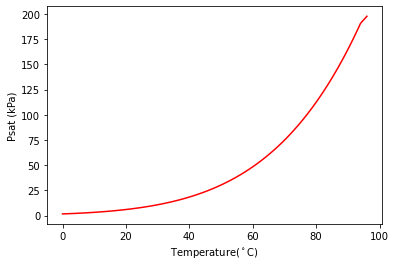

In [247]:
plot_data(P_vals,T_vals) #we are calling the values from Psat_calc to get values of P and T from plotting the data. 

In [228]:
names= ['ethanol','water','methanol','acetone','benzene']
A=[16.8958,16.3872,16.5785,14.3145,13.7819]
B=[3795.17,3885.70,3638.27,2756.22,2726.81]
C=[230.918,230.170,239.500,228.060,217.572]
keys=['A','B','C']

main = {}
for i, name in enumerate(names):
    sub_dict = {'A': A[i], 'B': B[i], 'C': C[i]}
    main[name] = sub_dict
print(main)

{'ethanol': {'A': 16.8958, 'B': 3795.17, 'C': 230.918}, 'water': {'A': 16.3872, 'B': 3885.7, 'C': 230.17}, 'methanol': {'A': 16.5785, 'B': 3638.27, 'C': 239.5}, 'acetone': {'A': 14.3145, 'B': 2756.22, 'C': 228.06}, 'benzene': {'A': 13.7819, 'B': 2726.81, 'C': 217.572}}


In [647]:
import seaborn as sns
def dict_calc(main, Tmin, Tmax):
    d_main={}
    for i, n in main.items():
        A,B,C = n.values()
        lst_name =main.keys()
        #print(i)
        pi_sat=[]
        ti_vals=[]
        for T in np.linspace(Tmin,Tmax,96):
            P_sat=np.exp(A-(B/(T+C)))
            #print('{} kPa'.format(P_sat))
            pi_sat.append(P_sat)
            ti_vals.append(int(T))
        dict_vals={'p_sat':pi_sat,'T':ti_vals}
        #print(dict_vals)
        plt.figure()
        col=sns.color_palette('muted')
        plt.plot(ti_vals,pi_sat,color=col[3],label=i)
        plt.legend()
        plt.xlabel('Temperature($^\circ$C)')
        plt.ylabel('Psat (kPa)')
        plt.show
    return 

None


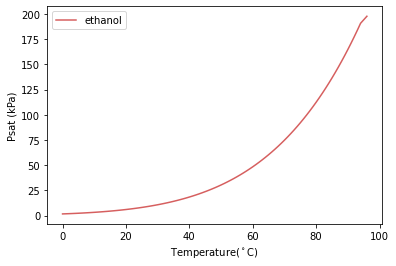

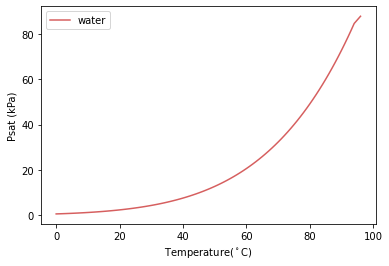

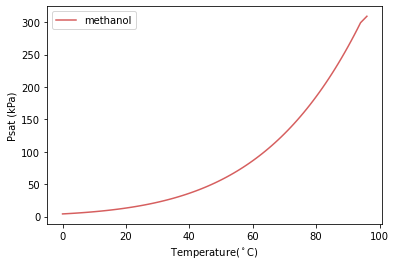

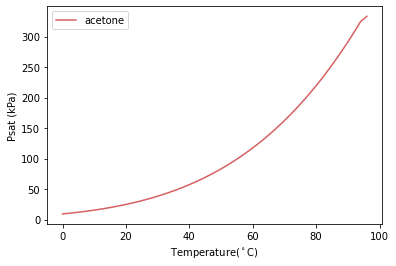

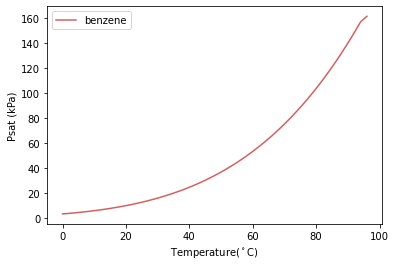

In [648]:
dict_plot={}
dict_plot= dict_calc(main, Tmin=0, Tmax=96)
print(dict_plot)

In [649]:
#Raoult's - assuming mix of ethanol and water let's calculate equilibrium vapor phase composition and pressure at 90 C 
#when the mole fraction of ethanol is 0.3
#taking subscripts for ethanol as 1 and water as 2
#manual way
mol_frac1=0.3
#ethanol stuff
T= 90
A1= 16.8958
B1= 3795.17
C1= 230.918
P1_sat= np.exp(A1-(B1/(T+C1)))
print (P1_sat)
#water stuff
A2 = 16.3872
B2 = 3885.7
C2 = 230.17
P2_sat= np.exp(A2-(B2/(T+C2)))
print (P2_sat)
Y1=mol_frac1*P1_sat
Y2=(1-mol_frac1)*P2_sat
print(Y1,Y2)
Tot_p=Y1+Y2
print(Tot_p)
y1=Y1/Tot_p
y2=1-y1
print(y1,y2)

159.14560397819398
70.1639708787535
47.743681193458194 49.114779615127446
96.85846080858565
0.4929221546046511 0.5070778453953488


In [793]:
def R_law(T, A1,B1,C1,A2,B2,C2):
    y1_m=[]
    y2_m=[]
    for Ti in np.linspace(0,120,120):
        T_m=(int(Ti))
        P1_sat= np.exp(A1-(B1/(T_m+C1)))#Antonie Eqn to get P1_sat and P2_sat
        P2_sat= np.exp(A2-(B2/(T_m+C2)))
        Y1=mol_frac1*P1_sat
        Y2=(1-mol_frac1)*P2_sat
        Tot_p=Y1+Y2 #p_bubble
        #print(Tot_p)
        y1=Y1/Tot_p
        y2=1-y1
        y1_m.append(y1)
        y2_m.append(y2)
        #print(y1_m,y2_m)
    plt.figure()
    plt.plot(y1_m,y1_m,color='red')
    plt.xlabel('Eq. vapor phase comp Ethanol')
    plt.ylabel('Eq. vapor phase comp Water')
    plt.show()
    return y1,y2

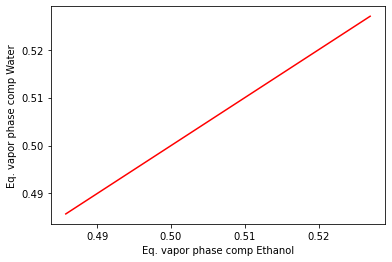

In [794]:
ans1,ans2=R_law(T=90, A1=16.8958,B1=3795.17,C1=230.918,A2=16.3872,B2=3885.7,C2=230.17)

In [801]:
from scipy.optimize import fsolve
y1=0.33
y2=1-y1
P=120
#Antonie const
eth=[16.8958,3795.17,230.918]
wat=[16.3872,3885.7,230.17]
def Psat1(T):
    return np.exp(eth[0]-eth[1]/(T+eth[2]))
def Psat2(T):
    return np.exp(wat[0]-wat[1]/(T+wat[2]))
def f(z):
    T,x1,x2=z
    f0=y1*P-x1*Psat1(T)
    f1=y2*P-x2*Psat2(T)
    f2=x1+x2-1
    return(f0,f1,f2)
z=fsolve(f,[109,0.2,0.8])
print(z)

[99.07051146  0.1797739   0.8202261 ]
